In [5]:
import pandas as pd
from math import log
from konlpy.tag import Kkma
from konlpy.tag import Hannanum
import numpy as np
from tqdm import tqdm
from math import log10
from sklearn.feature_extraction.text import CountVectorizer
df = pd.read_csv('C:/Users/user/github/Web_Crawling/csv/화학_total.csv').iloc[25551:29207,:]
ddf = pd.read_csv("C:/Users/user/github/Web_Crawling/csv/cyword.csv")

In [2]:
kkma = Kkma()
stop_words = list(ddf.iloc[:,0])

In [6]:
#docs = []
z = []
for i in tqdm(range(25551,29207)):
    a = df.iloc[:,1][i] # 모든 title은 1행에 존재
    #do = []
    docs = []
    k1 = kkma.pos(a)
    for (k ,tclass) in k1:
        if (tclass == 'NNG') & (len(k)>1):
            docs.append(k)
    z.append(docs)

100%|██████████| 3656/3656 [00:23<00:00, 153.07it/s]


In [7]:
z

[['인천', '석유', '화학', '사장', '행복', '추구', '강조'],
 ['작년', '수출', '수출', '견인', '반도체', '석유', '화학', '급감', '종합'],
 ['관영', '고려대', '교수', '한국', '화학', '공학', '회장', '취임'],
 ['재활용', '규제', '강화', '화학', '업계'],
 ['한화', '화학사', '합병'],
 ['마이너스', '정제', '마진', '화학', '새해', '시작'],
 ['출발', '기업', '태양광', '화학', '방산', '한화', '글로벌', '공략', '가속'],
 ['신년', '기획', '정유', '화학', '가속화', '에너지', '소재', '변신', '안간힘'],
 ['화학', '경기', '공동', '모금', '라면', '상당', '전달'],
 ['이슈', '정유사', '정제', '마진', '약화', '석유', '화학', '산업', '돌파'],
 ['신학', '화학', '부회장', '지속', '가능성', '기업', '생존', '조건'],
 ['신학', '화학', '부회장', '배터리', '자동차', '소재', '강화'],
 ['인사', '한국', '화학', '연구원'],
 ['이수', '그룹', '이수화학', '공장', '시무식', '개최'],
 ['한화', '동관', '태양광', '석유', '화학', '날개'],
 ['코스', '화학', '특별', '관계자', '지분', '변동'],
 ['국내', '화학', '업계', '유일', '참가', '배터리', '소재', '빌리티', '집중'],
 ['한화', '화학', '태양광', '한화', '솔루션'],
 ['소송', '화재', '화학', '새해', '배터리', '도약'],
 ['화학', '상승', '확대'],
 ['충돌', '국내', '석유', '화학', '종목', '주가', '급등', '특징'],
 ['특징', '한국', '석유', '에너지', '화학', '국제', '유가', '상승', '강세'],
 ['영화학', '배

In [8]:
docs = []
for i in range(len(z)):
    docs.append((' ').join(z[i]))

In [9]:
vocab = list(set(w for doc in docs for w in doc.split()))
vocab.sort()

In [10]:
N = len(docs) 

def tf(t, d):
  return d.count(t)

def idf(t):
  df = 0
  for doc in docs:
    df += t in doc
  return log(N/(df+1))

def tfidf(t, d):
  return tf(t,d)* idf(t)

In [11]:
result = []

# 각 문서에 대해서 아래 연산을 반복
for i in range(N):
  result.append([])
  d = docs[i]
  for j in range(len(vocab)):
    t = vocab[j]
    result[-1].append(tf(t, d))

tf_ = pd.DataFrame(result, columns=vocab)
tf_

,가격,가결,가공,가공품,가구,가까이,가나,가능,가능성,가동,...,흡연,흡입,흡착,흥국,희귀,희망,희비,희생,희토류,히트
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3651,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3652,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3653,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3654,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
result = []
for j in range(len(vocab)):
    t = vocab[j]
    result.append(idf(t))

idf_ = pd.DataFrame(result, index=vocab, columns=["IDF"])
idf_

,IDF
가격,5.806230
가결,7.105513
가공,7.105513
가공품,7.510978
가구,7.510978
...,...
희망,6.124683
희비,6.258215
희생,7.510978
희토류,7.510978


In [13]:
result = []
for i in tqdm(range(N)):
  result.append([])
  d = docs[i]
  for j in range(len(vocab)):
    t = vocab[j]
    result[-1].append(tfidf(t,d))

tfidf_ = pd.DataFrame(result, columns = vocab)
tfidf_

100%|██████████| 3656/3656 [56:18<00:00,  1.08it/s] 


,가격,가결,가공,가공품,가구,가까이,가나,가능,가능성,가동,...,흡연,흡입,흡착,흥국,희귀,희망,희비,희생,희토류,히트
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3651,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3652,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3653,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3654,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
tfidf_.sum().sort_values(ascending=False)[:30]

배터리    946.284797
석유     918.634142
삼성     743.379561
물질     729.223240
공장     674.354681
코로나    609.199684
사고     607.532828
상승     520.694615
사업     507.905758
환경     505.786314
종합     476.826615
안전     460.614837
기업     457.751140
연구     449.180686
개발     430.420172
한국     423.992572
전자     420.245882
산업     415.103137
유해     404.150170
주가     396.524747
소재     392.408191
업계     380.375320
분기     367.093384
코스     361.915745
현대     349.821954
투자     343.473685
기술     339.780419
울산     338.774945
제품     335.410931
지원     335.410931
dtype: float64

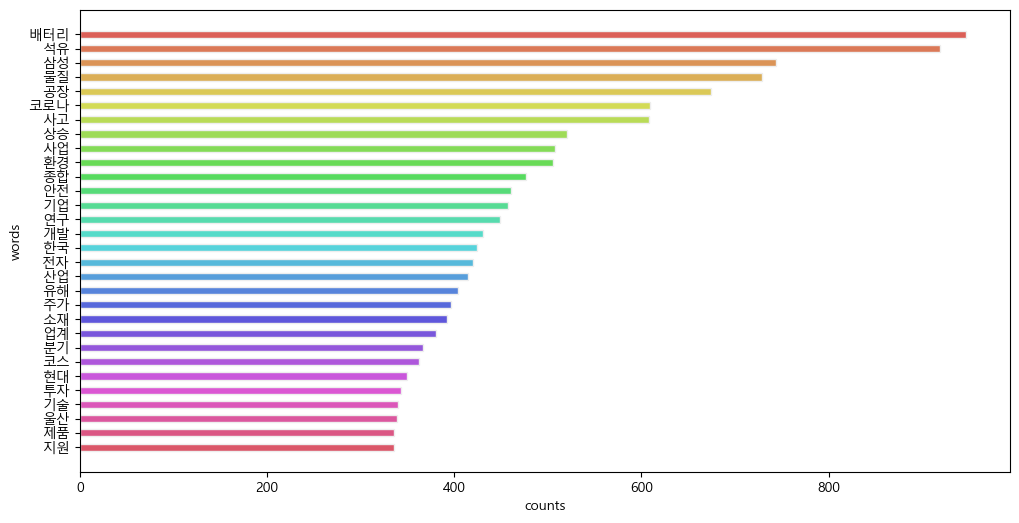

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
a = tfidf_.sum().sort_values(ascending=False)[:30]
plt.rc('font', family='Malgun Gothic') # 폰트 지정
plt.figure(figsize=(12,6))
x = a.index
y = a.values
plt.xticks(fontsize=10)
colors = sns.color_palette('hls',len(x)) ## 색상 지정
plt.barh(x, y, height=0.5, edgecolor='#eee', color=colors)
plt.gca().invert_yaxis()
plt.xlabel('counts')
plt.ylabel('words')
plt.show()